<a href="https://colab.research.google.com/github/lrburle/ML_Assignment1/blob/master/assignment1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Landon Burleson - Fall 2022

This assigment is used to demonstrate a basic Linear Regression model for various data sets. 

In [2]:
!git clone https://github.com/lrburle/ML_Assignment1.git

Cloning into 'ML_Assignment1'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 43 (delta 21), reused 33 (delta 11), pack-reused 0
Unpacking objects: 100% (43/43), done.


Shown below are the necessary imports needed for the assignment. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

The below code is used for the top level class of the assignment:

In [3]:
class assign1:
        def __init__(self):
                self.a = 0.3 #Learning rate

                #Basis Function Variables
                self.mu = 0 #Mean Value
                self.phi = 1 #Variance
        
        def init_theta(self, m, n):
                self.theta = np.random.random((m, n))

        def hypothesis(self, xdata):
                y = np.dot(self.theta, xdata)
                return y

        def costFunction(self, xdata, ydata):
                [m, n] = xdata.shape

                sum = 0
                for i in range(m):
                        sum += (self.hypothesis(xdata[i])-ydata[i])**2
                costf = (1/m) * sum

                return costf

        def gradientDescent(self, xdata, ydata):
                [m, n] = xdata.shape

                theta_new = self.theta.copy()

                for j in range(n):
                        sum = 0 
                        for i in range(m):
                                sum += (self.hypothesis(xdata[i]) - ydata[i]) * xdata[i, j]

                        theta_new[0, j] = self.theta[0, j] - self.a * (1 / m) * sum
                
                self.theta = theta_new 

	#Used to modifify the input data appropriately
        def sigmoidBasis(self, data):
                [m,n] = data.shape
                out = np.zeros((m, 1))
                out[:,0] = np.exp(((data[:, 0] - self.mu) ** 2) / (2*self.phi**2)) 
                return np.concatenate((data, out), axis=1)

        def polynomialBasis(self, data, order):
                [m,n] = data.shape
                out = np.zeros((m, 1))
                out[:,0] = data[:, 0] ** order
                return np.concatenate((data, out), axis=1) 
        
        def concatOnes(self, data):
                [m,n] = data.shape
                out = np.ones((m, 1))
                return np.concatenate((out, data), axis=1)
        
        #Parses the csv data for question 2
        def csvParse(self, csvFile):
                file = open(csvFile, 'r')
                #Grabbing the header names for each column
                reader = csv.DictReader(file)
                header = reader.fieldnames
                header = header[1:-1]
                file = file.readlines()[0:]
                data = np.loadtxt(file, delimiter=',')

                [x,y] = data.shape

                x_train = data[0:(x//2), 1:(y-1)]
                y_train = data[0:(x//2), (y-1)]
                x_test = data[(x//2):x, 1:(y-1)]
                y_test = data[(x//2):x, (y-1)]
                
                return x_train, y_train, x_test, y_test, header

	#Selects a feature set from the question 2 dataset
        def featureSelection(self, data, columns):
                [m,n] = data.shape
                data_out = np.ones((m, 1))

                for i in columns:
                        data_out = np.concatenate((data_out, data[:, i].reshape((m, 1))), axis=1)

                return data_out
        
        #Calculates the prediction error.
        def predictionError(self, actual, predicted):
                return (np.abs(actual - predicted) / np.abs(actual))

	#Local weight algorithms used for Question 3
        def localWeight(self, query, tao):
                [m, n] = self.x_train.shape
                self.w = np.zeros((m, 1))
                
                for i in range(m):
                        self.w[i] = np.exp(-(self.x_train[i] - query) ** 2 / (2*tao**2))

        def costFunctionLR(self):
                [m, n] = self.w.shape

                for i in range(m):
                       self.costfLR += self.w[i] * (self.theta.T * self.x_train[i] - self.y_train[i])
                
                self.constfLR = 0.5 * self.constfLR 
        
        def hypothesisDataGeneration(self, lowerbounds, upperbounds, order):
                xdata = np.linspace(lowerbounds, upperbounds, 1000)
                data = xdata 

                data = data.reshape((1000, 1))

                for i in range(2, order+1):
                        data = self.polynomialBasis(data, i)

                data = self.concatOnes(data) #Input data with the order desired to be concatenated into the original dataset.

                h = []

                for i in range(1000):
                        h.append(self.hypothesis(data[i]))

                return xdata, h

In [4]:
a1 = assign1()

# Question 1

The code found in the block below initializes the data set and the various variables used to measure the accuracy the built model.

In [9]:
#Load in the data to be used for question 1
x_test = np.load('./ML_Assignment1/x_test.npy')
x_train = np.load('./ML_Assignment1/x_train.npy')
y_test = np.load('./ML_Assignment1/y_test.npy')
y_train = np.load('./ML_Assignment1/y_train.npy')

#Training the model for assignment 1
order = 1 #Changes the polynomial basis functions.

for i in range(2, order+1):
        x_train = a1.polynomialBasis(x_train, i) #Input data with the order desired to be concatenated into the original dataset.

x_train = a1.concatOnes(x_train) #Place 1's in the first column of the data set. 

[n, m] = x_train.shape

#Initialize the Parameters based upon the dimensionality of the training dataset
a1.init_theta(1, m)

#Generate the initial hypothesis function
x, h = a1.hypothesisDataGeneration(np.min(x_train[:, 1]),np.max(x_train[:,1]), order )

#Generate initial point for cost function
error = []
error.append(a1.costFunction(x_train, y_train))

The following code block is used to plot and execute the gradient descent algorithm on the training dataset provided above. 

Initialzed theta array is: [[0.64820706 0.73937844]]
Current iteration is 0 @ error = [214.55749625]
Current iteration is 1 @ error = [185.65071956]
Current iteration is 2 @ error = [177.37009199]
Current iteration is 3 @ error = [173.32526908]
Current iteration is 4 @ error = [171.31689637]
Current iteration is 5 @ error = [170.31930795]
Current iteration is 6 @ error = [169.82378685]
Current iteration is 7 @ error = [169.57765206]
Current iteration is 8 @ error = [169.45539221]
Current iteration is 9 @ error = [169.39466341]
Current iteration is 10 @ error = [169.36449825]
Current iteration is 11 @ error = [169.34951465]
Current iteration is 12 @ error = [169.342072]
Current iteration is 13 @ error = [169.3383751]
Current iteration is 14 @ error = [169.33653878]
Current iteration is 15 @ error = [169.33562664]
Current iteration is 16 @ error = [169.33517357]
Current iteration is 17 @ error = [169.33494851]
Current iteration is 18 @ error = [169.33483673]
Current iteration is 19 @ err

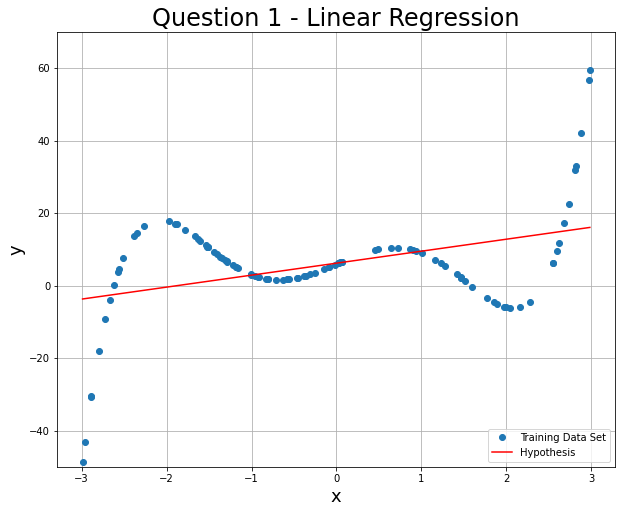

Theta array after training: [[6.19061211 3.30633333]]


In [10]:
#Plot the initial training data and hypothesis function.
plt.ion()
plt.figure(0, figsize=[10, 8])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('Question 1 - Linear Regression', fontsize=24)
plt.ylim(-50, 70)
og, hypth = plt.plot(x_train[:, 1], y_train, 'o', x, h, 'r-')

hypth.set_label('Hypothesis')
og.set_label('Training Data Set')
plt.legend(loc='lower right')
plt.grid()

print(f'Initialzed theta array is: {a1.theta}')

iterations = 100
for k in range(iterations):
        print(f'Current iteration is {k} @ error = {error[-1]}')
        a1.gradientDescent(x_train, y_train)
        x, h = a1.hypothesisDataGeneration(np.min(x_train[:, 1]),np.max(x_train[:,1]), order)
        error.append(a1.costFunction(x_train, y_train))
        epsilon = np.abs(error[-1] - error[-2])
        hypth.set_ydata(h)
        plt.draw()
        if (epsilon < 10e-6):
                print('Convergence threshold met.')
                break

plt.show()

print(f'Theta array after training: {a1.theta}')

The following code utilizes the linear regression model trained via gradient descent as shown above.

In [11]:
#Testing the model for Question 1
for i in range(2, order+1):
        x_test = a1.polynomialBasis(x_test, order) #Input data with the order desired to be concatenated into the original dataset.
x_test = a1.concatOnes(x_test) #Input data with the order desired to be concatenated into the original dataset.

# Collect the prediction error for each point in the test data set.
# e = []

# for i in range(n):
#         y = a1.hypothesis(x_test[i])
#         e.append(a1.predictionError(y_test[i], y))

# x = np.linspace(1, n+1)

# Question 2

The following code blocks are used to create the plots and graphics necessary to model the 